# Метед определения самой пивной дорамы с помощью рассчет косинусного сходства

В данной схеме баз данных "drams" и "comments", вы описываете две таблицы: "drams" - содержащую информацию о дорамах, и "comments" - содержащую комментарии к этим дорамам.

**drams**

* *id*: Идентификатор для каждой дорамы.
* *name*: Название дорамы.
* *genre*: Жанр или жанры, связанные с дорамой.
* *grade*: Рейтинг или оценка, данная дораме.
* *country*: Страна производства дорамы.
* *year*: Год выпуска дорамы.
* *poster*: URL постера дорамы.
* *time*: Длительность дорамы в часах и минутах.
* *description*: Краткое описание или сюжет дорамы.
* *orig_name*: Оригинальное название дорамы.
* *pivgrade*: Числовое значение, связанное с дорамой.
* *urllive*: URL на страницу, связанную с дорамой на "doramalive.ru".
* *urlclub*: URL на страницу, связанную с дорамой на "doramy.club".

**comments**

* *comment*: Текстовый комментарий или отзыв к фильму или дораме.
* *id*: Идентификатор комментария или отзыва.

In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
drams = pd.read_csv(r"F:\beeeer\block.csv")

In [274]:
drams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1037 non-null   int64  
 1   name         1037 non-null   object 
 2   genre        1037 non-null   object 
 3   grade        1037 non-null   float64
 4   country      1037 non-null   object 
 5   year         1037 non-null   int64  
 6   poster       1037 non-null   object 
 7   time         1037 non-null   object 
 8   description  1037 non-null   object 
 9   orig_name    1037 non-null   object 
 10  pivgrade     1037 non-null   object 
 11  urllive      1037 non-null   object 
 12  urlclub      1037 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 105.4+ KB


In [275]:
drams.tail(10)

,id,name,genre,grade,country,year,poster,time,description,orig_name,pivgrade,urllive,urlclub
1027,1285,Одарённые дорама (2015),Фантастика,7.43,Таиланд,2015,https://doramy.club/wp-content/uploads/2021/11/odaryonnye-2015.jpg,1 час 5 мин,"Дорама «Одаренные» В центре сюжета старшеклассник Пэнг, который получает высший балл за тестирование и случайно попадает в таинственный класс для особых, одаренных учеников.\\nПочему таинственный? Никто толком не понимает, чем именно занимаются там ученики, их программа значительно отличается от школьной, а отбор в тот класс ведет сам директор. Оказавшись внутри, Пэнг выясняет, что все еще загадочней, чем кажется на первый взгляд. Он и другие старшие школьники пытаются бороться со странной системой, во главе которой стоит директор школы",The Gifted,1.4,https://doramalive.ru/dorama/the_gifted/,https://doramy.club/28911-odaryonnye-2015.html
1028,1286,Катастрофическая жизнь Сайки К дорама (2017),Комедия,7.75,Япония,2017,https://doramy.club/wp-content/uploads/2022/06/katastroficheskaya-zhizn-sajki-k.jpg,1 час 37 мин,"Когда Сайки Кусуо появился на свет, его родители быстро поняли, что он необычный мальчик. Он сразу же начал говорить, через месяц ходить, а затем и перемещаться в пространстве. Позже выяснилось, что помимо прочего он умеет читать мысли и двигать вещи в воздухе.\\nМолодая пара несказанно обрадовалась способностям ребенка, но сам Сайки расстроился. Из-за своей необычности он не может вести нормальную жизнь, спокойно учиться и наслаждаться обществом друзей. Парень пытается скрывать свои силы, но иногда они выходят из-под контроля и наступает большая катастрофа!",Saiki Kusuo no Sainan,1.2,https://doramalive.ru/dorama/the_disastrous_life_of_saiki_k/,https://doramy.club/32133-katastroficheskaya-zhizn-sajki-k.html
1029,1287,Призраки повсюду дорама (2016),"Комедия, Ужасы",7.89,Таиланд,2016,https://doramy.club/wp-content/uploads/2021/12/prizraki-povsyudu.jpg,1 час 40 мин,"Во многих вещах люди привыкли мыслить стереотипно. Призраки также входят в один из стереотипов. В чем же он заключается? В том, что призраки – это души, которые приходят, чтобы поглотить, убить или навредить. Но никому не приходило в голову, что они могут быть потерянными, ранимыми. Может быть, у них есть эмоции, которыми они не могут поделиться с живыми. Возможно, они скучают по родным и близким, или может, пытаются предостеречь человека от опасности. Одно можно сказать точно, что призраки не приходят в нашу жизнь с плохими намерениями. Так и для главных героев,каждый призрак пришёл с определённой целью.",Ghost Is All Around,1.2,\N,https://doramy.club/29167-prizraki-povsyudu.html
1030,1288,Непревзойденная дорама (2021),"Боевик, Исторический, Приключения",9.23,Китай,2021,https://doramy.club/wp-content/uploads/2022/02/neprevzojdennaya.jpg,1 час 30 мин,"Дорама рассказывает о юной Ли Цзинь Жун — дочери легендарного Ли Чжэна и главы крепости 48ми. Северная армия Шэня захватила её дом и убила её людей. Чтобы спасти дочь, Ли Чжэн отправляет её за помощью. Но никто не собирается оказать девушке поддержку. Рискуя жизнью, Ли Цзинь Жун отправляется во дворец врага, желая мести.\\nПриквел к дораме — Легенда о Фэй",You Fei Po Xue Zhan,1.2,\N,https://doramy.club/30093-neprevzojdennaya.html
1031,1289,Крик влюбленных дорама (2016),"Драма, Мелодрама",9.00,Китай,2016,https://doramy.club/wp-content/uploads/2021/12/lyubov-navzryd.jpg,1 час 35 мин,"К 17- летнему Кэ Да приходит его первая любовь. Она невинная, милая и яркая, как и сама Ся Е — девушка, покорившая сердце парня навсегда. Ся Е увлекается плаванием и Кэ Да очарован этой хрупкой, но смелой девушкой. Этих двоих сближают проблемы в семье, ведь им обоим недостаёт внимания отцов. И молодые люди, поддерживая друг друга, становятся всё ближе и ближе. Но судьба вмешивается в их жизни. Ся Е оказывается неизлечима больна. И для героя наступают трудные времена. Если бы не «почта будущего» — аудиозаписи, отправленные девушкой для Кэ Да на 10 лет вперёд, -тот навряд ли смог продолжать жить как прежд

In [276]:
# Assuming 'pivgrade' is of object type and '\N' represents missing values
drams = drams[drams['pivgrade'] != '\\N']

# Convert 'pivgrade' column to numeric
drams['pivgrade'] = pd.to_numeric(drams['pivgrade'], errors='coerce')

# Drop rows with missing values after conversion
drams = drams.dropna(subset=['pivgrade'])

# Sort and select columns
dreams_pivgrade = drams.sort_values(by='pivgrade', ascending=False).head(10)
dreams_pivgrade = dreams_pivgrade[["id", "name", "pivgrade"]]
print(dreams_pivgrade)


       id                                               name  pivgrade
67    236                 У бабули есть талант дорама (2015)      11.4
82    251                 Экстремальная работа дорама (2019)      10.2
884  1053                    Впечатляющая ночь дорама (2015)       9.4
348   517                                 Боль дорама (2011)       9.4
41    210                               Хитмэн дорама (2020)       8.2
165   334                          Психометрия дорама (2013)       7.4
75    244                       Пугающий роман дорама (2011)       7.4
18    187                               Всегда дорама (2011)       7.4
16    185  Красота внутри / Внутренняя красота дорама (2015)       7.4
50    219                           Наше время дорама (2015)       7.2


In [277]:
comments = pd.read_csv(r"F:\beeeer\comments.csv")
print(comments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29837 entries, 0 to 29836
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  29837 non-null  object
 1   id       29837 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 466.3+ KB
None


In [278]:
commentscopy = comments.copy()
commentscopy

,comment,id
0,"Отличный фильм! Без соплей, зомби-апокалипсис как он есть! 10 из 10",73
1,"На мой вкус, фильм поверхностный не хватило серий, сам замысел, историю, не раскрыли. А актёры сыграли отлично.",74
2,"Хорошая,милая, пересмотрю",74
3,мне понравилась 10/10,74
4,"Даже зарегалась для того, чтобы сказать — манга явно была интереснее, и ГОРАЗДО логичнее. Дорама ламповая, приятная, но это совсем не то.",74
...,...,...
29832,Прекрасная печальная любовь ? Корейцы лучшие в таких фильмах ??,1294
29833,"Если вы думаете , что эта дорама слишком хороша и ваше сердце разбито , посмотрите «Алые сердца Корё». После этой дорамы никакая не понравится так сильно",1294
29834,"Как-то все уныло. До конца смотреть не стоит, только если любите унылость",1294
29835,"Очень понравился, поставила 10. Очень напомнил фильм молодость, выпускной класс, и поездки с классом, прямо ностальгия. А по эмоциям: Вначале ржала аки лошадь, потом переживала, потом печаль. Обязательно стоит смотреть.",1294


In [279]:
pd.set_option('display.max_colwidth', None)

commentscopy[commentscopy['id'] == 951]

,comment,id
15709,лучшый фильм главные роли очень даже подходящие Особенно Шун Огури обожаю его,951
15710,"Просто эппик вин!! очень хорошо сняли второй фильм, по сравнению с первым здесь почти все по аниме/манге, что безмерно радует!! Теперь я наверное посмотрела все что (что было с озвучкой/субтитрами) связано с Гин-саном и компанией. Гинтоки — люблю прилюблю. Отдельно хочу сказать про неподражаемого Окиту Сого, ну как сказать » АААААААААААА» криком сказать насколько сильно люблю !! (под Окитой подразумеваю и актера и персонажа) Минусы говорить не буду без меня найдете к чему предаться.\\r\n В общем советую лично мне понравилось!!",951


In [280]:
import pandas as pd

# Assuming your DataFrame is named 'comments_df'
# Replace 'comments_df' with the actual name of your DataFrame

# Count the number of rows before removing empty comments
rows_before = len(commentscopy)

# Drop rows with empty comments
comments_df = commentscopy.dropna(subset=['comment'])

# Reset the index after dropping rows
comments_df = comments_df.reset_index(drop=True)

# Count the number of rows after removing empty comments
rows_after = len(comments_df)

# Print the updated DataFrame and the number of rows removed
print(comments_df)
print(f"\nNumber of rows removed: {rows_before - rows_after}")


                                                                                                                                                                                                                            comment  \
0                                                                                                                                                               Отличный фильм! Без соплей, зомби-апокалипсис как он есть! 10 из 10   
1                                                                                                                   На мой вкус, фильм поверхностный не хватило серий, сам замысел, историю, не раскрыли. А актёры сыграли отлично.   
2                                                                                                                                                                                                         Хорошая,милая, пересмотрю   
3                                                                           

Данные полные

In [281]:
non_null_values_count = commentscopy['comment'].count()
print(f"Количество заполненных значений в столбце 'comment': {non_null_values_count}")

Количество заполненных значений в столбце 'comment': 29837


In [282]:
comments['id'], comments['comment'] = comments['comment'], comments['id']
comments = comments.rename(columns={'id': 'comment', 'comment': 'id'})

Данные полные

In [283]:
non_null_values_count = comments['comment'].count()
print(f"Количество заполненных значений в столбце 'comment': {non_null_values_count}")
commentscopy

Количество заполненных значений в столбце 'comment': 29837


,comment,id
0,"Отличный фильм! Без соплей, зомби-апокалипсис как он есть! 10 из 10",73
1,"На мой вкус, фильм поверхностный не хватило серий, сам замысел, историю, не раскрыли. А актёры сыграли отлично.",74
2,"Хорошая,милая, пересмотрю",74
3,мне понравилась 10/10,74
4,"Даже зарегалась для того, чтобы сказать — манга явно была интереснее, и ГОРАЗДО логичнее. Дорама ламповая, приятная, но это совсем не то.",74
...,...,...
29832,Прекрасная печальная любовь ? Корейцы лучшие в таких фильмах ??,1294
29833,"Если вы думаете , что эта дорама слишком хороша и ваше сердце разбито , посмотрите «Алые сердца Корё». После этой дорамы никакая не понравится так сильно",1294
29834,"Как-то все уныло. До конца смотреть не стоит, только если любите унылость",1294
29835,"Очень понравился, поставила 10. Очень напомнил фильм молодость, выпускной класс, и поездки с классом, прямо ностальгия. А по эмоциям: Вначале ржала аки лошадь, потом переживала, потом печаль. Обязательно стоит смотреть.",1294


In [284]:
import sklearn
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

Установила библиотеку emoji чтобы перобразовать эмоджи в текст для дальнейшей и посмотрим будет ли это играть роль.

!pip install emoji

In [285]:
print(commentscopy.loc[21954, 'comment'])

В возрасте лет так 13 14 Я была бы в восторге,  но мои 21 это какой то бредовый ржач 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣 что за тупизм?  Поэтому я не особо люблю японские дорамы😏, хотя аниме и манга у них в топе 🔝🔝🔝🔥🤩


Вывод показыват что эмоджи не релевантны для лучшего понимания. Принимаем решение удалить все эмоджи.

In [286]:
import emoji
import re

def remove_emoji(input_text):
    # Заменяем все эмодзи на пустую строку и возвращаем их количество
    matches = re.findall(r'(:[^:\s]+:|[\U00010000-\U0010ffff])', input_text)
    cleaned_text = re.sub(r'(:[^:\s]+:|[\U00010000-\U0010ffff])', '', input_text)
    return cleaned_text, matches

# Открываем файл для чтения
with open("comments_correct.csv", "r", encoding='utf-8', errors='replace') as input_file:
    # Открываем новый файл для записи
    with open("comments_correct_clean.csv", "w", encoding='utf-8') as output_file:
        # Обрабатываем каждую строку входного файла
        total_removed = 0
        for line in input_file:
            # Удаляем эмодзи из строки
            cleaned_line, matches = remove_emoji(line)
            total_removed += len(matches)
            # Записываем очищенную строку в выходной файл
            output_file.write(cleaned_line)

print(f"Очистка завершена. Удалено {total_removed} эмодзи.")

Очистка завершена. Удалено 6507 эмодзи.


In [287]:
comments_correct_clean = pd.read_csv(r"comments_correct_clean.csv")

In [288]:
def standardize_text_russian(comments_correct_clean, comment):
    comments_correct_clean[comment] = comments_correct_clean[comment].str.replace(r"http\S+", "")
    comments_correct_clean[comment] = comments_correct_clean[comment].str.replace(r"http", "")
    comments_correct_clean[comment] = comments_correct_clean[comment].str.replace(r"@\S+", "")
    comments_correct_clean[comment] = comments_correct_clean[comment].str.replace(r"[^А-Яа-я0-9(),!?@\'\`\"\_\n]", " ")
    comments_correct_clean[comment] = comments_correct_clean[comment].str.replace(r"@", "at")
    comments_correct_clean[comment] = comments_correct_clean[comment].str.lower()
    return comments_correct_clean

# Применение функции к DataFrame с русским текстом и столбцом "comment"
comments_correct_clean = standardize_text_russian(comments_correct_clean, "comment")

# Сохранение изменений в файл CSV
comments_correct_clean.to_csv("clean_data_russian.csv", index=False)

# Вывод первых нескольких строк измененного DataFrame
print(comments_correct_clean.tail())


         id  \
29832  1294   
29833  1294   
29834  1294   
29835  1294   
29836  1294   

                                                                                                                                                                                                                            comment  
29832                                                                                                                                                               прекрасная печальная любовь ? корейцы лучшие в таких фильмах ??  
29833                                                                     если вы думаете , что эта дорама слишком хороша и ваше сердце разбито , посмотрите «алые сердца корё». после этой дорамы никакая не понравится так сильно  
29834                                                                                                                                                     как-то все уныло. до конца смотреть не стоит, только если любите 

In [289]:
average_length = comments_correct_clean['comment'].str.len().mean()
print(f'Средняя длина строк в столбце "comment": {average_length:.2f}')

Средняя длина строк в столбце "comment": 196.87


In [290]:
# Сохранение исходного DataFrame перед удалением строк
initial_comments_correct_clean = comments_correct_clean.copy()

# Получение максимальной длины строки
max_length = comments_correct_clean['comment'].str.len().max()

# Получение минимальной длины строки
min_length = comments_correct_clean['comment'].str.len().min()

# Получение средней длины строки
average_length = comments_correct_clean['comment'].str.len().mean()

# Удаление строк, где количество символов в столбце "comment" меньше 20
comments_correct_clean = comments_correct_clean[comments_correct_clean['comment'].apply(lambda x: len(str(x)) >= 20)]

# Рассчет и вывод количества удаленных строк
deleted_rows_count = len(initial_comments_correct_clean) - len(comments_correct_clean)
print(f'Удалено строк: {deleted_rows_count}')

# Находим индексы строк с самой большой и самой маленькой длиной
max_length_index = comments_correct_clean['comment'].str.len().idxmax()
min_length_index = comments_correct_clean['comment'].str.len().idxmin()

# Получаем содержание строк
max_length_comment = comments_correct_clean.loc[max_length_index, 'comment']
min_length_comment = comments_correct_clean.loc[min_length_index, 'comment']

# Выводим результаты
print(f'Средняя длина символов в столбце "comment": {average_length:.2f}')
print(f'Самая большая длина символов в столбце "comment": {max_length}')
print(f'Самая маленькая длина символов в столбце "comment": {min_length}')


Удалено строк: 1647
Средняя длина символов в столбце "comment": 196.87
Самая большая длина символов в столбце "comment": 4466.0
Самая маленькая длина символов в столбце "comment": 1.0


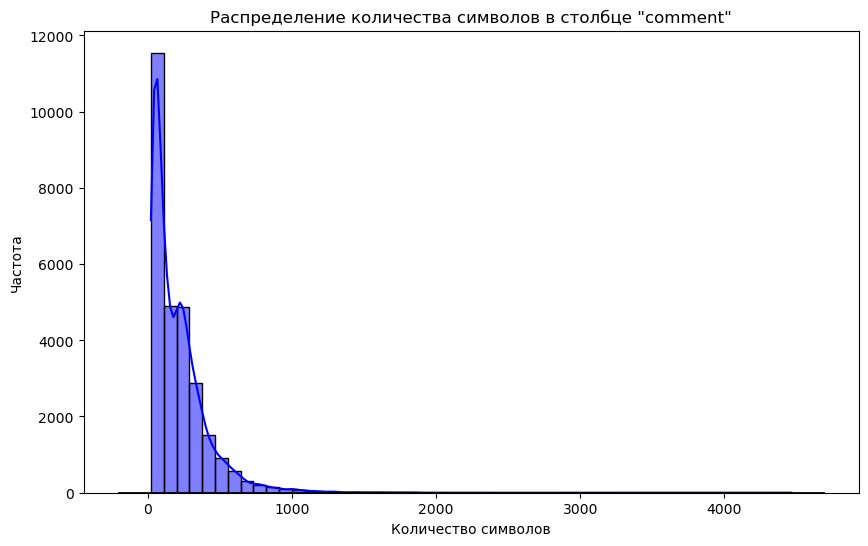

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Создание графика распределения количества символов
plt.figure(figsize=(10, 6))
sns.histplot(comments_correct_clean['comment'].str.len(), kde=True, color='blue', bins=50)

# Добавление оценки плотности нормального распределения
mu, std = norm.fit(comments_correct_clean['comment'].str.len())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Добавление подписей
plt.title('Распределение количества символов в столбце "comment"')
plt.xlabel('Количество символов')
plt.ylabel('Частота')

# Вывод графика
plt.show()

Теперь, когда наши входные данные стали более разумными, давайте преобразуем их так, чтобы наша модель могла их понять.

Исполоьзуем токенизатор RegexpTokenizer из библиотеки nltk для быстрой токенизации.

In [292]:
from nltk.tokenize import RegexpTokenizer

comments_correct_clean_token1 = comments_correct_clean
tokenizer = RegexpTokenizer(r'\w+')

comments_correct_clean_token1["tokens"] = comments_correct_clean_token1["comment"].apply(tokenizer.tokenize)
comments_correct_clean_token1

,id,comment,tokens
0,73,"отличный фильм! без соплей, зомби-апокалипсис как он есть! 10 из 10","[отличный, фильм, без, соплей, зомби, апокалипсис, как, он, есть, 10, из, 10]"
1,74,"на мой вкус, фильм поверхностный не хватило серий, сам замысел, историю, не раскрыли. а актёры сыграли отлично.","[на, мой, вкус, фильм, поверхностный, не, хватило, серий, сам, замысел, историю, не, раскрыли, а, актёры, сыграли, отлично]"
2,74,"хорошая,милая, пересмотрю","[хорошая, милая, пересмотрю]"
3,74,мне понравилась 10/10,"[мне, понравилась, 10, 10]"
4,74,"даже зарегалась для того, чтобы сказать — манга явно была интереснее, и гораздо логичнее. дорама ламповая, приятная, но это совсем не то.","[даже, зарегалась, для, того, чтобы, сказать, манга, явно, была, интереснее, и, гораздо, логичнее, дорама, ламповая, приятная, но, это, совсем, не, то]"
...,...,...,...
29832,1294,прекрасная печальная любовь ? корейцы лучшие в таких фильмах ??,"[прекрасная, печальная, любовь, корейцы, лучшие, в, таких, фильмах]"
29833,1294,"если вы думаете , что эта дорама слишком хороша и ваше сердце разбито , посмотрите «алые сердца корё». после этой дорамы никакая не понравится так сильно","[если, вы, думаете, что, эта, дорама, слишком, хороша, и, ваше, сердце, разбито, посмотрите, алые, сердца, корё, после, этой, дорамы, никакая, не, понравится, так, сильно]"
29834,1294,"как-то все уныло. до конца смотреть не стоит, только если любите унылость","[как, то, все, уныло, до, конца, смотреть, не, стоит, только, если, любите, унылость]"
29835,1294,"очень понравился, поставила 10. очень напомнил фильм молодость, выпускной класс, и поездки с классом, прямо ностальгия. а по эмоциям: вначале ржала аки лошадь, потом переживала, потом печаль. обязательно стоит смотреть.","[очень, понравился, поставила, 10, очень, напомнил, фильм, молодость, выпускной, класс, и, поездки, с, классом, прямо, ностальгия, а, по, эмоциям, вначале, ржала, аки, лошадь, потом, переживала, потом, печаль, обязательно, стоит, смотреть]"


Как мы видим слова в предложениях разделены, но они стоят в разных наклонених, также нет очистки от лишних символов.

Более подробно проведем токенизацию.

In [293]:
comments_correct_clean_token2 = comments_correct_clean

def preprocess(text, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stop_words:
                preprocessed_text.append(lemma)
    return preprocessed_text

In [294]:
from nltk.corpus import stopwords
import pymorphy3
from nltk import word_tokenize

punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...', '«', '»', ';', '–', '--',"''" , '\\', '10', "—"]
stop_words = stopwords.words("russian")
morph = pymorphy3.MorphAnalyzer()

In [295]:
comments_correct_clean_token2['tokens'] = comments_correct_clean_token2.apply(lambda row: preprocess(row['comment'], punctuation_marks, stop_words, morph), axis=1)

In [296]:
comments_correct_clean_token2

,id,comment,tokens
0,73,"отличный фильм! без соплей, зомби-апокалипсис как он есть! 10 из 10","[отличный, фильм, сопля, зомби-апокалипсис]"
1,74,"на мой вкус, фильм поверхностный не хватило серий, сам замысел, историю, не раскрыли. а актёры сыграли отлично.","[вкус, фильм, поверхностный, хватить, серия, замысел, история, раскрыть, актёр, сыграть, отлично]"
2,74,"хорошая,милая, пересмотрю","[хороший, милый, пересмотреть]"
3,74,мне понравилась 10/10,"[понравиться, 10/10]"
4,74,"даже зарегалась для того, чтобы сказать — манга явно была интереснее, и гораздо логичнее. дорама ламповая, приятная, но это совсем не то.","[зарегалася, сказать, манга, явно, интересный, гораздо, логичный, дорама, ламповый, приятный, это]"
...,...,...,...
29832,1294,прекрасная печальная любовь ? корейцы лучшие в таких фильмах ??,"[прекрасный, печальный, любовь, кореец, хороший, такой, фильм]"
29833,1294,"если вы думаете , что эта дорама слишком хороша и ваше сердце разбито , посмотрите «алые сердца корё». после этой дорамы никакая не понравится так сильно","[думать, этот, дорама, слишком, хороший, ваш, сердце, разбитый, посмотреть, алый, сердце, корё, дорама, никакой, понравиться, сильно]"
29834,1294,"как-то все уныло. до конца смотреть не стоит, только если любите унылость","[как-то, уныло, конец, смотреть, стоить, любить, унылость]"
29835,1294,"очень понравился, поставила 10. очень напомнил фильм молодость, выпускной класс, и поездки с классом, прямо ностальгия. а по эмоциям: вначале ржала аки лошадь, потом переживала, потом печаль. обязательно стоит смотреть.","[очень, понравиться, поставить, 10., очень, напомнить, фильм, молодость, выпускной, класс, поездка, класс, прямо, ностальгия, эмоция, вначале, ржать, аки, лошадь, переживать, печаль, обязательно, стоить, смотреть]"


In [297]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in comments_correct_clean_token2["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in comments_correct_clean_token2["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

576823 words total, with a vocabulary size of 42340
Max sentence length is 528


Текстовые данные имеют в общей сложности 579.066 слов, из которых 42.341 уникальных

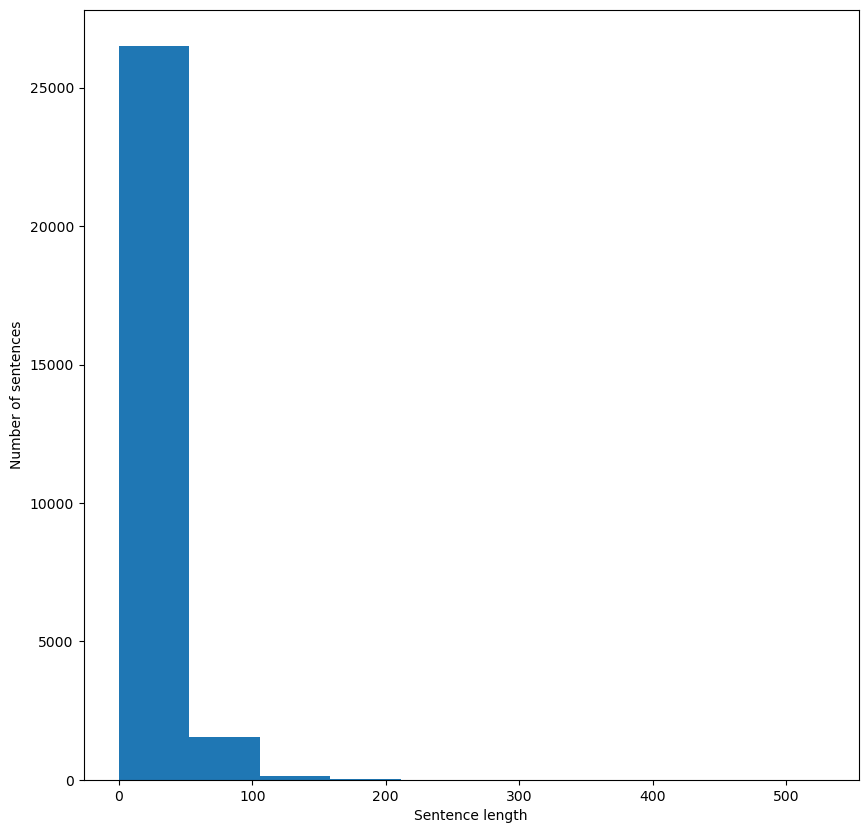

In [298]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

Определяем частоту слов

In [299]:
from collections import Counter

test_counter = Counter(comments_correct_clean_token2['tokens'][24462])
test_counter

Counter({'фильм': 18,
         'очень': 12,
         'семья': 8,
         'свой': 7,
         'который': 6,
         'второй': 5,
         'всё': 5,
         'актёр': 5,
         'один': 4,
         'жизнь': 4,
         'взаимоотношение': 4,
         'хороший': 4,
         'просто': 4,
         'немножко': 4,
         'первый': 3,
         'видеть': 3,
         'два': 3,
         'пак': 3,
         'богатый': 3,
         'корейский': 3,
         'олицетворять': 3,
         'время': 3,
         'понять': 3,
         'это': 3,
         'талантливый': 3,
         'сыграть': 3,
         'такой': 3,
         'сочувствие': 3,
         'качественный': 3,
         'популярный': 3,
         'роль': 3,
         'оскар': 2,
         'очередь': 2,
         'сюжет': 2,
         'кастома': 2,
         'корея': 2,
         'сказать': 2,
         'разный': 2,
         'мир': 2,
         'больший': 2,
         'общество': 2,
         '2': 2,
         'типичный': 2,
         'амплуа': 2,
         'фамил

In [300]:
words = Counter()

for txt in comments_correct_clean_token2['tokens']:
    words.update(txt)

len(words)

42340

In [301]:
words.most_common(100) # часто всречающиеся слова

[('фильм', 24325),
 ('очень', 11735),
 ('это', 7827),
 ('смотреть', 7049),
 ('понравиться', 5897),
 ('дорама', 5580),
 ('посмотреть', 5282),
 ('актёр', 5192),
 ('хороший', 4523),
 ('сюжет', 4316),
 ('просмотр', 4101),
 ('такой', 4058),
 ('просто', 3822),
 ('конец', 3080),
 ('который', 2980),
 ('герой', 2883),
 ('советовать', 2631),
 ('свой', 2628),
 ('интересный', 2580),
 ('весь', 2536),
 ('рекомендовать', 2489),
 ('человек', 2377),
 ('игра', 2311),
 ('главный', 2193),
 ('время', 2180),
 ('любовь', 2059),
 ('жизнь', 2059),
 ('история', 1993),
 ('всё', 1926),
 ('один', 1884),
 ('мочь', 1862),
 ('год', 1809),
 ('любить', 1729),
 ('сказать', 1680),
 ('первый', 1663),
 ('момент', 1661),
 ('думать', 1656),
 ('сам', 1609),
 ('роль', 1555),
 ('понять', 1497),
 ('отличный', 1480),
 ('красивый', 1457),
 ('вообще', 1414),
 ('стоить', 1367),
 ('хотеть', 1350),
 ('немного', 1327),
 ('тот', 1303),
 ('этот', 1296),
 ('быть', 1280),
 ('знать', 1261),
 ('классный', 1256),
 ('самый', 1245),
 ('прекрасн

In [405]:
words['водка']

3

In [397]:
# Assuming 'пиво' is the word you're interested in
count_pivo = words['пиво']

# Print the count
print(f"Count of 'пиво': {count_pivo}")


Count of 'пиво': 2


In [302]:
import gensim

model_path = r"F:\beeranddrams\base\model.bin"
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)


Проверка работоспособности словоря.

In [303]:
word_vector = model["солнце_NOUN", "алкоголь_NOUN", "пиво_NOUN", "угар_NOUN", "хмель_NOUN", "мат_NOUN", "трезвый_NOUN", "душевно_NOUN", "вино_NOUN","мат_NOUN", "веселый_NOUN"]
print(word_vector)

[[-4.0472946  -1.4410981  -0.72920346 ... -2.023993   -1.2292678
   0.1914636 ]
 [ 1.7320822  -1.1064229   4.2394876  ...  0.31309098  4.3683395
  -1.2338072 ]
 [-0.7403311   1.2414607  -0.03133442 ... -0.35185948  2.091816
  -0.9011193 ]
 ...
 [ 0.19501296 -0.20126426  0.01394349 ... -2.1746614   2.1793306
   0.55422604]
 [-0.21004376 -0.5691009   1.3394607  ...  0.3725333   0.9877221
  -0.6840793 ]
 [-0.1384015   1.0162544  -0.5029898  ... -1.5415183  -0.00555816
   1.3025554 ]]


Добавляем "_NOUN" к каждому элементу токена для обрабтки словарем.

In [304]:
comments_correct_clean_token2["tokens"] = comments_correct_clean_token2["tokens"].apply(lambda tokens: [token + "_NOUN" for token in tokens])
comments_correct_clean_token2

,id,comment,tokens
0,73,"отличный фильм! без соплей, зомби-апокалипсис как он есть! 10 из 10","[отличный_NOUN, фильм_NOUN, сопля_NOUN, зомби-апокалипсис_NOUN]"
1,74,"на мой вкус, фильм поверхностный не хватило серий, сам замысел, историю, не раскрыли. а актёры сыграли отлично.","[вкус_NOUN, фильм_NOUN, поверхностный_NOUN, хватить_NOUN, серия_NOUN, замысел_NOUN, история_NOUN, раскрыть_NOUN, актёр_NOUN, сыграть_NOUN, отлично_NOUN]"
2,74,"хорошая,милая, пересмотрю","[хороший_NOUN, милый_NOUN, пересмотреть_NOUN]"
3,74,мне понравилась 10/10,"[понравиться_NOUN, 10/10_NOUN]"
4,74,"даже зарегалась для того, чтобы сказать — манга явно была интереснее, и гораздо логичнее. дорама ламповая, приятная, но это совсем не то.","[зарегалася_NOUN, сказать_NOUN, манга_NOUN, явно_NOUN, интересный_NOUN, гораздо_NOUN, логичный_NOUN, дорама_NOUN, ламповый_NOUN, приятный_NOUN, это_NOUN]"
...,...,...,...
29832,1294,прекрасная печальная любовь ? корейцы лучшие в таких фильмах ??,"[прекрасный_NOUN, печальный_NOUN, любовь_NOUN, кореец_NOUN, хороший_NOUN, такой_NOUN, фильм_NOUN]"
29833,1294,"если вы думаете , что эта дорама слишком хороша и ваше сердце разбито , посмотрите «алые сердца корё». после этой дорамы никакая не понравится так сильно","[думать_NOUN, этот_NOUN, дорама_NOUN, слишком_NOUN, хороший_NOUN, ваш_NOUN, сердце_NOUN, разбитый_NOUN, посмотреть_NOUN, алый_NOUN, сердце_NOUN, корё_NOUN, дорама_NOUN, никакой_NOUN, понравиться_NOUN, сильно_NOUN]"
29834,1294,"как-то все уныло. до конца смотреть не стоит, только если любите унылость","[как-то_NOUN, уныло_NOUN, конец_NOUN, смотреть_NOUN, стоить_NOUN, любить_NOUN, унылость_NOUN]"
29835,1294,"очень понравился, поставила 10. очень напомнил фильм молодость, выпускной класс, и поездки с классом, прямо ностальгия. а по эмоциям: вначале ржала аки лошадь, потом переживала, потом печаль. обязательно стоит смотреть.","[очень_NOUN, понравиться_NOUN, поставить_NOUN, 10._NOUN, очень_NOUN, напомнить_NOUN, фильм_NOUN, молодость_NOUN, выпускной_NOUN, класс_NOUN, поездка_NOUN, класс_NOUN, прямо_NOUN, ностальгия_NOUN, эмоция_NOUN, вначале_NOUN, ржать_NOUN, аки_NOUN, лошадь_NOUN, переживать_NOUN, печаль_NOUN, обязательно_NOUN, стоить_NOUN, смотреть_NOUN]"


In [305]:
element_counts = comments_correct_clean_token2['id'].value_counts()

In [430]:
element_counts[element_counts < 15].index

Index([ 931,  839,  566,  628,  723,  916,  806, 1188,  516,  695,
       ...
        994,  990, 1290,  924, 1003, 1213, 1004, 1275, 1013,  967],
      dtype='int64', name='id', length=403)

In [443]:
import re
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Определение весов ключевых слов
keyword_weights = {
    "пиво_NOUN": 10,
    "водка_NOUN": 5,
    "смех_NOUN": 5,
    "душа_NOUN": 5,
    "пьяный_NOUN": 4,
    "смешно_NOUN": 3,
    "мат_NOUN": 3
}


# Функция для вычисления векторов
def calculate_vectors(tokens):
    return np.mean([model[token] * keyword_weights.get(token, 1) for token in tokens if token in model.key_to_index], axis=0) \
        if any(token in model.key_to_index for token in tokens) else np.zeros(model.vector_size)

# Применение функции к столбцу tokens
comments_correct_clean_token2["vectors"] = comments_correct_clean_token2["tokens"].apply(calculate_vectors)

# Вычисление целевого вектора с учетом весов
target_keywords = ["пиво_NOUN",
    "водка_NOUN",
    "смех_NOUN",
    "душа_NOUN",
    "пьяный_NOUN",
    "смешно_NOUN",
    "мат_NOUN"
    ] 
target_vector = np.mean([model[keyword] * keyword_weights.get(keyword, 1) for keyword in target_keywords if keyword in model], axis=0)

# Вычисление векторов для всех комментариев
all_comments_vectors = np.vstack(comments_correct_clean_token2["vectors"].to_numpy())

# Рассчет косинусного сходства для всех комментариев с целевым вектором
cosine_similarities = cosine_similarity(all_comments_vectors, [target_vector])

# Добавление результатов в DataFrame
comments_correct_clean_token2["average_cosine_similarity"] = cosine_similarities

# Определение элементов, где количество комментариев меньше 10
element_counts = comments_correct_clean_token2['id'].value_counts()
id_to_set_zero = element_counts[element_counts < 15].index

# Установка значения 0 для тех id, где количество комментариев меньше 15
comments_correct_clean_token2.loc[comments_correct_clean_token2['id'].isin(id_to_set_zero), 'average_cosine_similarity'] = 0

# Усреднение косинусных сходств для каждого уникального id
result_df = comments_correct_clean_token2.groupby("id")["average_cosine_similarity"].mean().reset_index()

# Вывод результатов
print(result_df)


       id  average_cosine_similarity
0      72                   0.050119
1      73                   0.053344
2      74                   0.072437
3      75                   0.075838
4      76                   0.117223
..    ...                        ...
979  1306                   0.009982
980  1307                   0.000000
981  1309                   0.000000
982  1313                   0.073181
983  1380                   0.000000

[984 rows x 2 columns]


In [444]:
result_df.head(20)

,id,average_cosine_similarity
0,72,0.050119
1,73,0.053344
2,74,0.072437
3,75,0.075838
4,76,0.117223
5,77,0.074158
6,78,0.072860
7,79,0.071362
8,173,0.067793
9,174,0.093854


In [445]:
from IPython.display import display

drams.rename(columns={'id': 'dram_id'}, inplace=True)
merged_df = pd.merge(result_df, drams, how='inner', left_on='id', right_on='dram_id')

In [458]:
merged_df

,id,average_cosine_similarity,dram_id,name,genre,grade,country,year,poster,time,description,orig_name,pivgrade,urllive,urlclub
0,73,0.053344,73,Живой | Выжить дорама (2020),"Боевик, Драма, Триллер, Ужасы",9.31,Южная Корея,2020,https://doramy.club/wp-content/uploads/2020/07/zhivoj.jpg,1 час 37 мин,"Проснувшись однажды утром, Чжун У обнаруживает нечто странное и ужасающее. В Сеуле произошла вспышка неизвестного вируса, из-за которого люди начинают нападать друг на друга. Весь город в панике. Сотовая связь неисправна и нет доступного выхода в интернет. Чжун У и Ю Бин придётся буквально бороться за свою жизнь в изолированном жилом комплексе.",#Salaidda,3.5,https://doramalive.ru/dorama/alive/,https://doramy.club/21566-zhivoj.html
1,75,0.075838,75,Настроение дня дорама (2016),"Драма, Комедия, Мелодрама",8.99,Южная Корея,2016,https://doramy.club/wp-content/uploads/2018/12/nastroenie-dnya.jpg,1 час 43 мин,"Дорама «Настроение дня» повествует о романтической судьбе двух молодых людей. Главная героиня Су Чжон – обладательница очаровательной внешности и состоявшаяся в своей профессии молодая девушка. Стабильную размеренную жизнь беспокоят только мысли о свадьбе, ведь ее молодой человек, несмотря на длительные отношения, вовсе не торопится зарегистрировать с ней брак. Неустроенность личной жизни начинает негативным образом влиять на настроение Су Чжон, и, в конечном счете, вовсе портится, когда она узнает о предстоящей свадьбе ее первой любви Мин Сок и школьной подруги.\\nСобираясь в командировку в Пусан, Су Чжон одолевают смешанные чувства, с одной стороны, это обиды, с другой — зависть подругам. Мрачные мысли девушки были прерваны молодым попутчиком Чжэ Хёном, который буквально разорвал череду грустных мыслей своим жизнелюбием и энергией. Чжэ Хён действительно легко идет по жизни, не строит серьезных планов и не заглядывает в будущее. Однако интерес молодого человека к миловидной попутчице не ограничился одной лишь встречей.",Keunalui Bonwigi,1.4,https://doramalive.ru/dorama/mood_of_the_day/,https://doramy.club/9702-nastroenie-dnya.html
2,77,0.074158,77,Река грусти | Река скорби дорама (2018),"Драма, Мелодрама",9.12,Китай,2018,https://doramy.club/wp-content/uploads/2020/03/reka-skorbi.jpg,1 час 45 мин,"Фильм-драма «Река грусти» знакомит нас с ученицей старшей школы И Яо. Девушка вместе с мамой живёт по соседству со своим одноклассником Ци Мином. Молодые люди с детства дружат, вот только образ жизни каждого из них сильно отличается. Если Ци Мин растёт любимым ребенком в состоятельной семье, то И Яо живёт в крайней бедности и вынуждена терпеть равнодушие и бесконечные упрёки своей матери. Казалось бы, жизнь и так жестока обошлась с девочкой, но самое страшное для неё начинается после того, как она узнает о своем венерическом заболевании. Девушка в отчаянии и замешательстве, ведь она никогда не была близка с мужчиной.\\nЕй ничего не остаётся, как скрывать это ото всех. Однако новенькая ученица в их классе Тан Сяоми, влюбленная в Ци Мина, сразу невзлюбила И Яо, и, узнав о её секрете, сообщает о нём всей школе. С тех самых пор жизнь героини превращается в настоящий кошмар, ведь теперь она объект для издевательств, и ежедневно подвергается жестокой травле со стороны сверстников. Девушка на грани отчаяния, но в самый тяжёлый момент за неё заступается парень из параллельного класса Гу Суньси, единственный, кто поверит в невинность И Яо. Теперь у нее есть тот, кто поддерживает её и всячески защищает. Вот только на долю героини выпадает ещё одно серьезное испытание. В силах ли она преодолеть его?",Bei shang ni liu cheng he,1.2,https://doramalive.ru/dorama/cry_me_a_sad_river/,https://doramy.club/10093-reka-grusti.html
3,78,0.072860,78,Полночь дорама (2021),Триллер,9.09,Южная Корея,2021,https://doramy.club/wp-content/uploads/2021/07/polnoch.jpg,1 час 42 мин,"Сюжет полнометражного фильма «Полночь» разворачивается вокруг молодой девушки по имени Кен Ми. У неё проблемы со слухом, однако она научилась жить с этим, не испытывая сильного дискомфорта. Одна

In [447]:
# Сортировка по убыванию по значению cosine_similarity
sorted_average = merged_df.sort_values(by='average_cosine_similarity', ascending=False)

# Вывод отсортированных значений
done_sorted_average = sorted_average[['id', 'average_cosine_similarity']].head(20)
done_sorted_average

,id,average_cosine_similarity
67,236,0.184626
348,517,0.158480
876,1077,0.133714
326,495,0.130506
548,731,0.130427
865,1066,0.127634
906,1228,0.124163
473,656,0.123552
37,206,0.122366
303,472,0.119440


Объеденим таблицы по id, чтобы узнать название дорамы

In [449]:
output = drams[['dram_id', 'name', "pivgrade"]]

In [450]:
np.mean(cosine_similarities)

0.06499668202648762

In [451]:
zero_similarity_count = (result_df["average_cosine_similarity"] == 0).sum()

# Вывод результата
print("Количество уникальных id с average_cosine_similarity равным 0:", zero_similarity_count)

Количество уникальных id с average_cosine_similarity равным 0: 403


In [457]:
pd.set_option('display.max_colwidth', None)

commentscopy[commentscopy['id'] == 1077]

,comment,id
26813,слов нету што за параша блин,1077
26814,"не теряйте время на просмотр, ни смысла, ни игры актеров, ни эстетического удовольствия от видеоряда, пошло, тупо, с юмором напряжёнка",1077
26815,"Это такой «американский пирог» про Корею 19 века, уже не Чосон, а Хан, где все эти западные ценности растлевают молодежь! Ужос, что твориццо!)))",1077
26816,"Основные персонажи — молодые студенты, постоянно озабоченные, как бы потерять девственность, а до тех пор удовлетворяются картинками собственного производства и даже делают на них маленький бизнес.",1077
26817,"И вот — как ответ на их молитвы, появляется женщина, которая их похищает, связывает и лишает девственности. Вероятно, это — одна из новых студенток, которым как раз разрешили учиться.\\r\nНо кто?",1077
26818,"Нужно помнить, что юмор здесь такой же специфический, как и в Американском пироге. Если зашел он, понравится и это.",1077
26819,Фильм просто бомба мне. Так понравилось. Весь фильм смеялась. Корейцы молодцы. Рекомендую. Оценка 100/100,1077
26820,Ржака,1077
26821,"Фраза: «Ура меня сегодня изнасилуют, просто очень смешная» 🤪🤪🤪",1077
26822,"Фильм никакой. Пара -тройка пошлых шуточек не стоит траты времени на просмотр. Если бы не впихнули в фильм посредственную любовную линию и доработали сцены с маньячкой- вышла бы угарная пошлая комедия, а так больше 5 поставить не могу",1077


In [453]:
done_sorted_average_df = pd.DataFrame(done_sorted_average)
drams_df = pd.DataFrame(output)

# Объединение таблиц по столбцу 'id'
result_df = pd.merge(done_sorted_average_df, drams_df, left_on='id', right_on='dram_id', how='left')

# Удаление дублирующего столбца 'dram_id'
result_df = result_df.drop(columns=['dram_id'])
result_df

,id,average_cosine_similarity,name,pivgrade
0,236,0.184626,У бабули есть талант дорама (2015),11.4
1,517,0.158480,Боль дорама (2011),9.4
2,1077,0.133714,Школа молодежи: Коррупция морали дорама (2014),2.4
3,495,0.130506,Классика дорама (2003),1.7
4,731,0.130427,Необъятный океан дорама (2020),7.2
5,1066,0.127634,Красавица дорама (2000),1.7
6,1228,0.124163,Десять лет любви к тебе дорама (2022),1.5
7,656,0.123552,Ветеран дорама (2015),3.4
8,206,0.122366,Чистая любовь дорама (2016),5.4
9,472,0.119440,Влюбленная вампирша дорама (2015),2.7


In [428]:
dreams_pivgrade # Твоя оценка

,id,name,pivgrade
67,236,У бабули есть талант дорама (2015),11.4
82,251,Экстремальная работа дорама (2019),10.2
884,1053,Впечатляющая ночь дорама (2015),9.4
348,517,Боль дорама (2011),9.4
41,210,Хитмэн дорама (2020),8.2
165,334,Психометрия дорама (2013),7.4
75,244,Пугающий роман дорама (2011),7.4
18,187,Всегда дорама (2011),7.4
16,185,Красота внутри / Внутренняя красота дорама (2015),7.4
50,219,Наше время дорама (2015),7.2


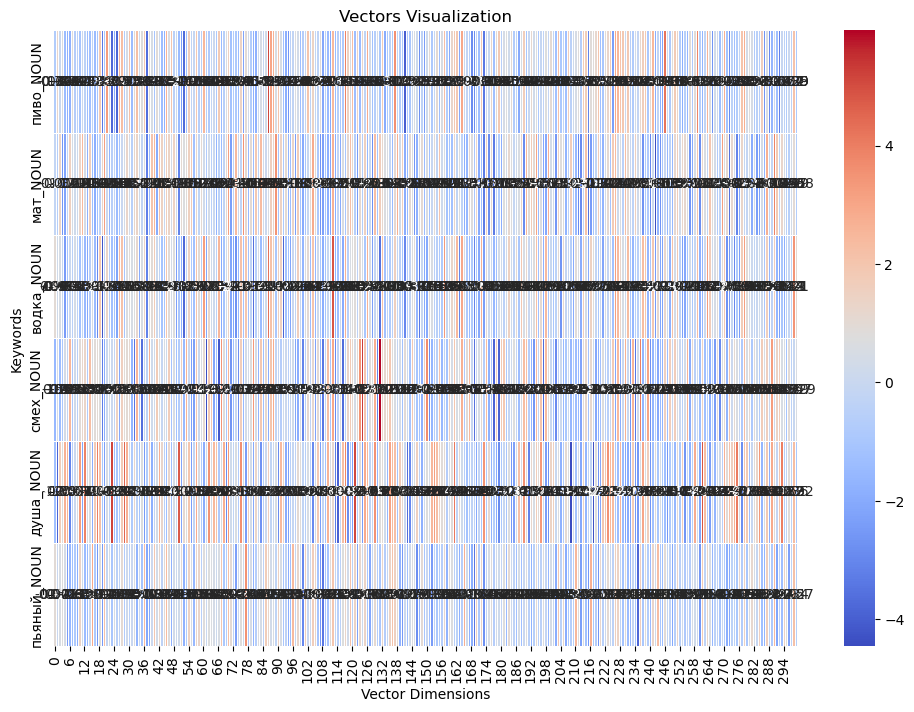

In [455]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем случайные 10 слов из ключевых слов для визуализации
random_keywords = np.random.choice(list(keyword_weights.keys()), min(10, len(keyword_weights)), replace=False)

# Проверяем, присутствуют ли слова в словаре модели
valid_keywords = [key for key in random_keywords if key in model.key_to_index]

# Создаем DataFrame для векторов этих слов
vectors_df = pd.DataFrame([model[key] for key in valid_keywords], index=valid_keywords)

# Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(vectors_df, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Vectors Visualization")
plt.xlabel("Vector Dimensions")
plt.ylabel("Keywords")
plt.show()

